# 1. Introdução

Este notebook demonstra as principais transformações geométricas usadas em visão computacional. As transformações são baseadas nos fundamentos matemáticos apresentados em aula.

In [1]:
#pacotes e funções auxiliares
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab.patches import cv2_imshow
import math

def show_image(img, title):
  plt.figure(figsize=(10,5))
  plt.imshow(img)
  plt.title(title)
  plt.axis('off')
  plt.show()


# 2. Dados
Esta será a imagem utilizada para todas as transformações.

In [2]:
# Verifica se já foram baixadas as imagens do drive, baixando-as e descompactando se necessário
! [ ! -d "/content/opencv_demo.png" ] && gdown -O /content/opencv_demo.png "1nrqyKspDuNO5PhU3PoduNTYq8MZUFzAl"

image_path = Path("/content/opencv_demo.png")

Downloading...
From: https://drive.google.com/uc?id=1nrqyKspDuNO5PhU3PoduNTYq8MZUFzAl
To: /content/opencv_demo.png
100% 1.77M/1.77M [00:00<00:00, 43.1MB/s]


(1024, 1024, 3)


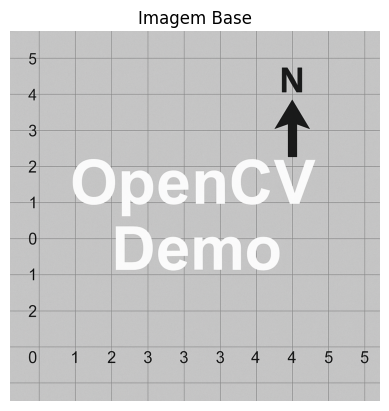

In [3]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
h, w, _ = img.shape

plt.imshow(img)
plt.title('Imagem Base')
plt.axis('off')
plt.show()


# 3. Operações Básicas

## 3.1. Translação
Desloca a imagem no plano (tx, ty).

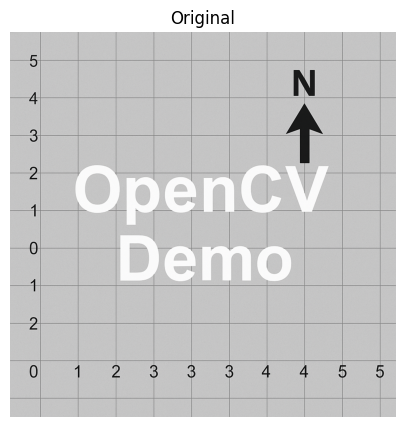

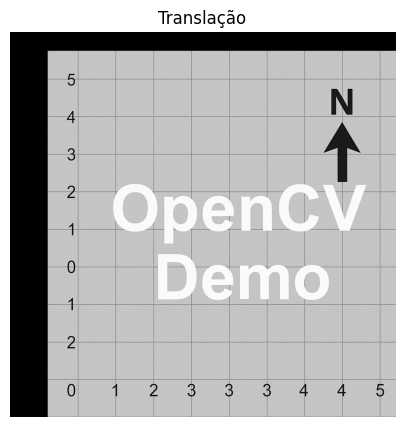

In [4]:
M_trans = np.float32([[1, 0, 100],
                      [0, 1, 50]])
img_translated = cv2.warpAffine(img, M_trans, (w, h))

show_image(img, "Original")
show_image(img_translated, "Translação")

## 3.2. Rotação
Rotaciona a imagem em torno de um ponto.

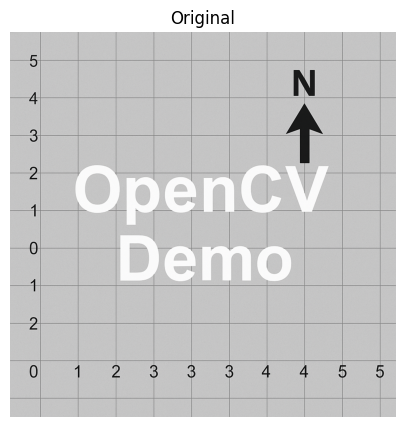

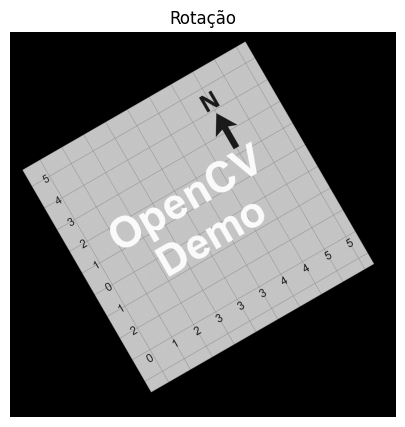

In [5]:
tx = 50
ty = 550

theta = math.radians(-30)

M_rot = np.float32([[math.cos(theta), -math.sin(theta), tx],
                    [math.sin(theta), math.cos(theta), ty]])
img_rotated = cv2.warpAffine(img, M_rot, (int(w*1.5), int(h*1.5)))

show_image(img, "Original")
show_image(img_rotated, "Rotação")

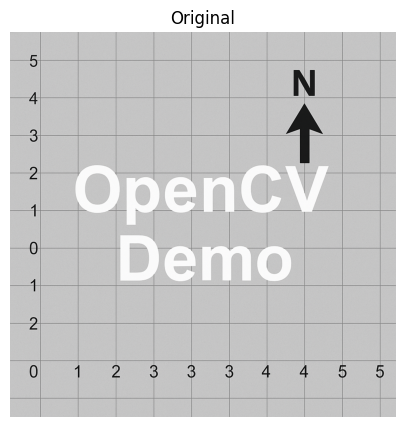

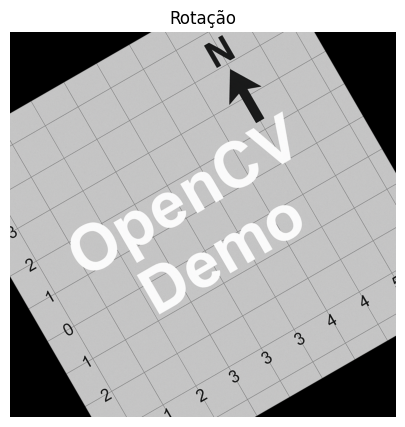

In [6]:
center = (w//2, h//2)
M_rot = cv2.getRotationMatrix2D(center, angle=30, scale=1)
img_rotated = cv2.warpAffine(img, M_rot, (w, h))

show_image(img, "Original")
show_image(img_rotated, "Rotação")

## 3.3. Escalonamento (Resize)
Aumenta ou diminui o tamanho da imagem.

In [7]:
tx = 0
ty = 0

sx = 0.5
sy = 0.5

M_scale = np.float32([[sx, 0, tx],
                      [0, sy, ty]])
img_scaled = cv2.warpAffine(img, M_scale, (int(w/2), int(h/2)))

cv2_imshow(img)
cv2_imshow(img_scaled)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
img_scaled = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

cv2_imshow(img)
cv2_imshow(img_scaled)

Output hidden; open in https://colab.research.google.com to view.

## 3.4. Reflexão (Flip)
Espelhamento da imagem horizontal e vertical.

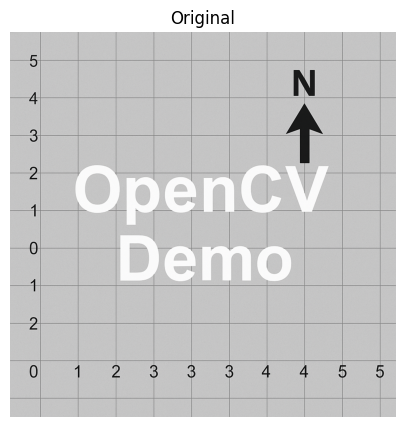

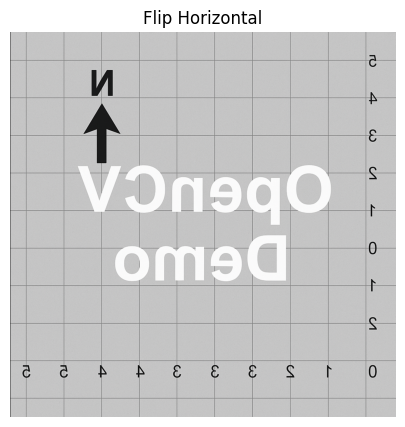

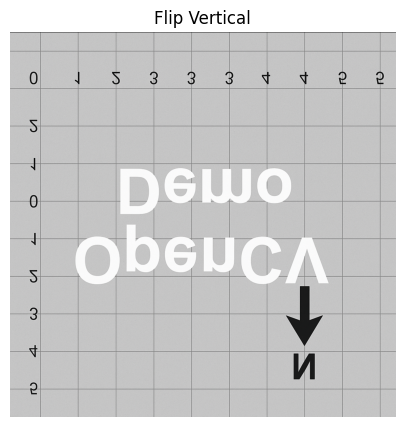

In [9]:
M_Flip_H = np.float32([[-1, 0, w],
                       [0, 1, 0]])
M_Flip_V = np.float32([[1, 0, 0],
                       [0, -1, h]])

img_flip_h = cv2.warpAffine(img, M_Flip_H, (w, h))
img_flip_v = cv2.warpAffine(img, M_Flip_V, (w, h))

show_image(img, "Original")
show_image(img_flip_h, "Flip Horizontal")
show_image(img_flip_v, "Flip Vertical")

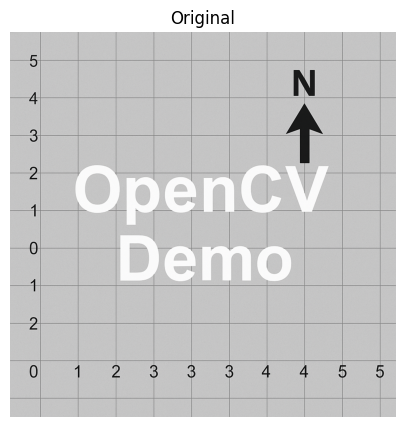

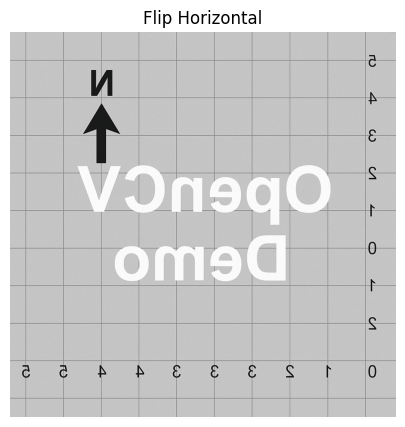

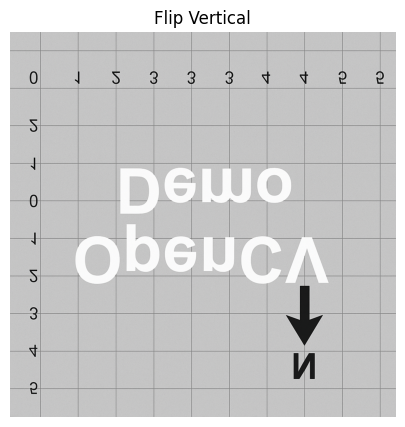

In [10]:
img_flip_h = cv2.flip(img, 1)
img_flip_v = cv2.flip(img, 0)

show_image(img, "Original")
show_image(img_flip_h, "Flip Horizontal")
show_image(img_flip_v, "Flip Vertical")

## 3.5. Cisalhamento (Shear)
Inclinação da imagem nos eixos X e Y.

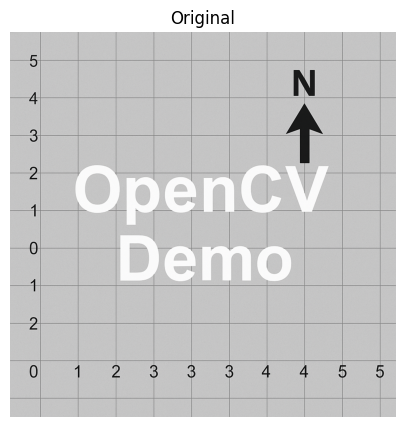

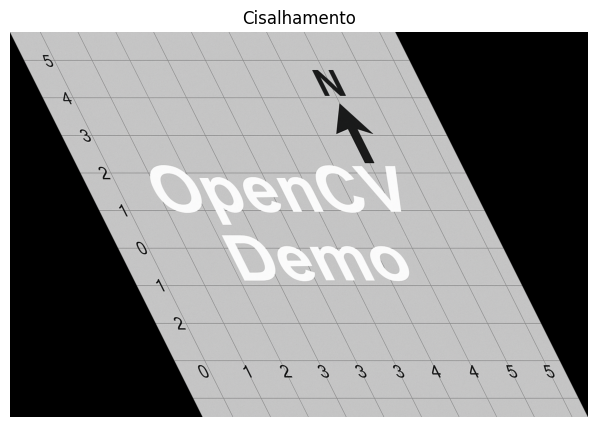

In [11]:
kx = 0.5
ky = 0

M_shear = np.float32([[1, kx, 0],
                      [ky, 1, 0]])

img_sheared = cv2.warpAffine(img, M_shear, (int(w * 1.5), h))

show_image(img, "Original")
show_image(img_sheared, "Cisalhamento")

# 4. Combinando Operações

É possível utilizar a mesma matriz para totas as operações de uma só vez.

In [12]:
tx = 50
ty = 550

sx = 0.5
sy = 0.5

kx = 0.7
ky = 0

theta = math.radians(-30)

M = np.float32([[sx*math.cos(theta) + kx, sy*-math.sin(theta), tx],
                [sx*math.sin(theta), sy*math.cos(theta) + ky, ty]])
img_transformed = cv2.warpAffine(img, M, (int(w*1.5), int(h*1.5)))

cv2_imshow(img)
cv2_imshow(img_transformed)

Output hidden; open in https://colab.research.google.com to view.